Kkolejna część zajęć będzie wprowadzeniem do drugiej, szeroko używanej biblioteki w Pythonie: `sklearn`. Zajęcia będą miały charaktere case-study poprzeplatane zadaniami do wykonania. Zacznijmy od załadowania odpowiednich bibliotek.

In [1]:
# ! pip install matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

Zacznijmy od załadowania danych. Na dzisiejszych zajęciach będziemy korzystać z danych z portalu [gapminder.org](https://www.gapminder.org/data/).

In [3]:
df = pd.read_csv('gapminder.csv', index_col=0)

Dane zawierają różne informacje z większość państw świata (z roku 2008). Poniżej znajduje się opis kolumn:
 * female_BMI - średnie BMI u kobiet
 * male_BMI - średnie BMI u mężczyzn
 * gdp - PKB na obywatela
 * population - wielkość populacji
 * under5mortality - wskaźnik śmiertelności dzieni pon. 5 roku życia (na 1000 urodzonych dzieci)
 * life_expectancy - średnia długość życia
 * fertility - wskaźnik dzietności

**zad. 1**
Na podstawie danych zawartych w `df` odpowiedz na następujące pytania:
 * Jaki był współczynniki dzietności w Polsce w 2018?
 * W którym kraju ludzie żyją najdłużej?
 * Z ilu krajów zostały zebrane dane?

In [4]:
df.loc['Poland', 'fertility']

1.33

In [5]:
df[df['life_expectancy'].max() == df['life_expectancy']]

female_BMI  male_BMI      gdp   population  under5mortality  \
Country                                                                
Japan      21.87088  23.50004  34800.0  127317900.0              3.4   

         life_expectancy  fertility  
Country                              
Japan               82.5       1.34

In [6]:
len(df)

175

**zad. 2** Stwórz kolumnę `gdp_log`, która powstanie z kolumny `gdp` poprzez zastowanie funkcji `log` (logarytm). 

Hint 1: Wykorzystaj funkcję `apply` (https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.apply.html#pandas.Series.apply).

Hint 2: Wykorzystaj fukcję `log` z pakietu `np`.

In [7]:
df['gdp_log'] = df['gdp'].apply(np.log)

Naszym zadaniem będzie oszacowanie długości życia (kolumna `life_expectancy`) na podstawie pozostałych zmiennych. Na samym początku, zastosujemy regresje jednowymiarową na `fertility`.

In [8]:
y = df['life_expectancy'].values
X = df['fertility'].values

print("Y shape:", y.shape)
print("X shape:", X.shape)

Y shape: (175,)
X shape: (175,)


Będziemy korzystać z gotowej implementacji regreji liniowej z pakietu sklearn. Żeby móc wykorzystać, musimy napierw zmienić shape na dwuwymiarowy.

In [9]:
y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

print("Y shape:", y.shape)
print("X shape:", X.shape)

Y shape: (175, 1)
X shape: (175, 1)


Jeszcze przed właściwą analizą, narysujmy wykres i zobaczny czy istnieje "wizualny" związek pomiędzy kolumnami.

<Axes: xlabel='fertility', ylabel='life_expectancy'>

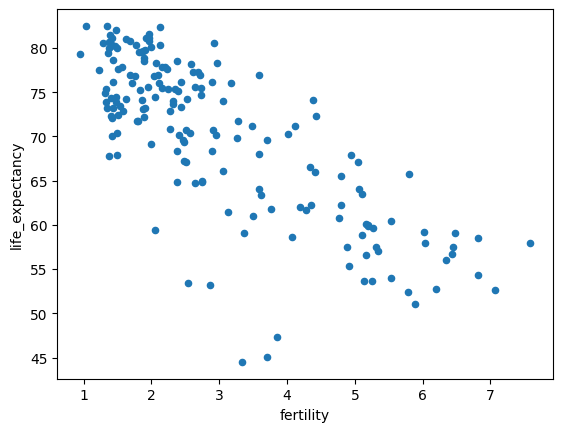

In [10]:
df.plot.scatter('fertility', 'life_expectancy')

**zad. 3** Zaimportuj `LinearRegression` z pakietu `sklearn.linear_model`.

In [11]:
from sklearn.linear_model import LinearRegression

Tworzymy obiekt modelu regresji liniowej.

In [12]:
model = LinearRegression()

Trening modelu ogranicza się do wywołania metodu `fit`, która przyjmuje dwa argumenty:

In [13]:
model.fit(X,y)

LinearRegression()

Współczynniki modelu:

In [14]:
print("Wyraz wolny (bias):", model.intercept_)
print("Współczynniki cech:", model.coef_)

Wyraz wolny (bias): [83.2025629]
Współczynniki cech: [[-4.41400624]]


**zad. 4** Wytrenuj nowy model `model2`, który będzie jako X przyjmie kolumnę `gdp_log`. Wyświetl parametry nowego modelu.

In [15]:
y = df['gdp_log'].values
X = df['fertility'].values

print("Y shape:", y.shape)
print("X shape:", X.shape)

y = y.reshape(-1, 1)
X = X.reshape(-1, 1)

print("Y shape:", y.shape)
print("X shape:", X.shape)

Y shape: (175,)
X shape: (175,)
Y shape: (175, 1)
X shape: (175, 1)


<Axes: xlabel='gdp_log', ylabel='life_expectancy'>

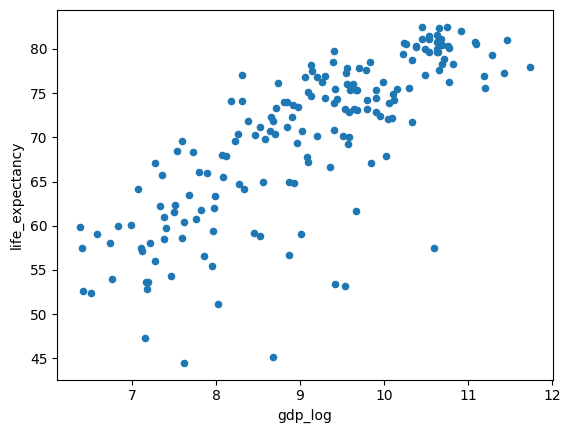

In [16]:
df.plot.scatter('gdp_log', 'life_expectancy')

In [17]:
model2 = LinearRegression()
model2.fit(X, y)

LinearRegression()

In [18]:
print("Wyraz wolny (bias):", model2.intercept_)
print("Współczynniki cech:", model2.coef_)

Wyraz wolny (bias): [10.97412729]
Współczynniki cech: [[-0.63200209]]


Mając wytrenowany model możemy wykorzystać go do predykcji. Wystarczy wywołać metodę `predict`.

In [19]:
X_test = X[:5,:]
y_test = y[:5,:]
output = model.predict(X_test)

for i in range(5):
    print("input: {}\t predicted: {}\t expected: {}".format(X_test[i,0], output[i,0], y_test[i,0]))

input: 6.2	 predicted: 55.83572421482946	 expected: 7.1785454837637
input: 1.76	 predicted: 75.43391191760766	 expected: 9.064620717626777
input: 2.73	 predicted: 71.15232586542413	 expected: 9.418492105471156
input: 6.43	 predicted: 54.82050277977564	 expected: 8.86827250899781
input: 2.16	 predicted: 73.66830942186188	 expected: 10.155646068918863


## Sprawdzenie jakości modelu - metryki: $MSE$

Istnieją 3 metryki, które określają jak dobry jest nasz model:
 * $MSE$: [błąd średnio-kwadratowy](https://pl.wikipedia.org/wiki/B%C5%82%C4%85d_%C5%9Bredniokwadratowy) 
 * $RMSE = \sqrt{MSE}$

In [20]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(y, model.predict(X)))
print("Root Mean Squared Error: {}".format(rmse))

Root Mean Squared Error: 61.20258121223673


In [21]:
# Import necessary modules
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

# Create the regressor: reg_all
reg_all = LinearRegression()

# Fit the regressor to the training data
reg_all.fit(X_train, y_train)

# Predict on the test data: y_pred
y_pred = reg_all.predict(X_test)

# Compute and print RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))


Root Mean Squared Error: 0.8330994741525843


## Regresja wielu zmiennych

Model regresji liniowej wielu zmiennych nie różni się istotnie od modelu jednej zmiennej. Np. chcąc zbudować model oparty o dwie kolumny: `fertility` i `gdp` wystarczy zmienić X (cechy wejściowe):

In [22]:
X = df[['fertility', 'gdp']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

print(X.shape)

model_mv = LinearRegression()
model_mv.fit(X_train, y_train)

print("Wyraz wolny (bias):", model_mv.intercept_)
print("Współczynniki cech:", model_mv.coef_)

y_pred = model_mv.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

(175, 2)
Wyraz wolny (bias): [9.47431285]
Współczynniki cech: [[-3.58540438e-01  4.05443491e-05]]
Root Mean Squared Error: 0.5039206253337853


**zad. 7** 
 * Zbuduj model regresji liniowej, która oszacuje wartność kolumny `life_expectancy` na podstawie pozostałych kolumn.
* Wyświetl współczynniki modelu.
* Oblicz wartości metryki rmse na zbiorze trenującym.
 

In [23]:
df.columns

Index(['female_BMI', 'male_BMI', 'gdp', 'population', 'under5mortality',
       'life_expectancy', 'fertility', 'gdp_log'],
      dtype='object')

In [24]:
X = df[['female_BMI', 'male_BMI', 'gdp', 'population', 'under5mortality', 'fertility', 'gdp_log']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=42)

print(X.shape)

model_mv = LinearRegression()
model_mv.fit(X_train, y_train)

print("Wyraz wolny (bias):", model_mv.intercept_)
print("Współczynniki cech:", model_mv.coef_)

y_pred = model_mv.predict(X_test)

rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

(175, 7)
Wyraz wolny (bias): [-2.48689958e-14]
Współczynniki cech: [[-4.53155263e-16  4.57243814e-16  5.81045637e-19  3.74348839e-26
   4.40441174e-16 -1.32227302e-16  1.00000000e+00]]
Root Mean Squared Error: 1.854651242181147e-14


**zad. 6**


 Zaimplementuj metrykę  $RMSE$  jako fukcję rmse (szablon poniżej). Fukcja rmse przyjmuje dwa parametry typu list i ma zwrócić wartość metryki  $RMSE$ .

In [25]:
def rmse(expected, predicted):
    """
    argumenty:
    expected (type: list): poprawne wartości
    predicted (type: list): oszacowanie z modelu
    """
    return np.sqrt(sum([(e-p)**2 for e,p in zip(expected,predicted)])/len(expected))
    

y = df['life_expectancy'].values
X = df[['fertility', 'gdp']].values

test_model = LinearRegression()
test_model.fit(X, y)

predicted = list(test_model.predict(X))
expected = list(y)

print(rmse(predicted,expected))
print(np.sqrt(mean_squared_error(predicted, expected)))

5.234841906276239
5.234841906276239
